In [24]:
import torch
device = torch.device('mps')

In [25]:
x = torch.randn(3, 4, requires_grad= True)
x


tensor([[-1.0160, -0.1432,  0.2640, -0.9386],
        [ 0.0108, -1.3267, -0.0061,  0.9699],
        [ 0.9874, -0.4120,  0.4967, -1.5684]], requires_grad=True)

In [26]:
b = torch.randn(3, 4, requires_grad=True)
b

tensor([[ 0.9914,  1.3271, -0.7467,  0.3816],
        [ 0.3960,  0.4871,  2.2255,  1.1800],
        [-0.1185,  0.2095,  0.6958,  0.0339]], requires_grad=True)

In [27]:
t = x + b
t

tensor([[-0.0246,  1.1839, -0.4827, -0.5571],
        [ 0.4068, -0.8396,  2.2194,  2.1499],
        [ 0.8689, -0.2025,  1.1925, -1.5345]], grad_fn=<AddBackward0>)

In [28]:
y = t.sum() 
y

tensor(4.3803, grad_fn=<SumBackward0>)

In [29]:
y.backward()

In [30]:
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [31]:
x.requires_grad, b.requires_grad, t.requires_grad

(True, True, True)

In [32]:
x = torch.randn(1)
b = torch.rand(1, requires_grad=True)
w = torch.rand(1, requires_grad=True)
y = w * x
z = y + b
x, y, z

(tensor([-0.3346]),
 tensor([-0.1058], grad_fn=<MulBackward0>),
 tensor([0.0949], grad_fn=<AddBackward0>))

In [33]:
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad, t.requires_grad

(False, True, True, True, True)

In [34]:
x.is_leaf, b.is_leaf, w.is_leaf, y.is_leaf, z.is_leaf

(True, True, True, False, False)

In [35]:
z.backward(retain_graph=True) 

In [36]:
w.grad, b.grad

(tensor([-0.3346]), tensor([1.]))

In [37]:
import numpy as np

In [38]:
x_values = torch.arange(1, 11).reshape(-1, 1)
x_values.size()

torch.Size([10, 1])

In [39]:
y_values = 2 * x_values + 1

In [40]:
import torch
import torch.nn as nn

device = torch.device('mps')

In [41]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

In [42]:
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim).to(device)

In [43]:
epochs = 1000 # 迭代次数
learning_rate = 0.01 # 学习率
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 优化器
criteria = nn.MSELoss() # 损失函数
losses = []

In [44]:
from tqdm import trange


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/6s/jttrjjc92qj8wflfcb45sxlw0000gn/T/ipykernel_34697/1234138704.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(x_values, dtype=torch.float32).to(device)
/var/folders/6s/jttrjjc92qj8wflfcb45sxlw0000gn/T/ipykernel_34697/1234138704.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_values, dtype=torch.float32).to(device)
 12%|█▏        | 121/1000 [00:00<00:01, 650.76it/s]

epoch 0, loss 114.4811782836914
epoch 50, loss 0.2992951571941376
epoch 100, loss 0.19648616015911102


 29%|██▉       | 291/1000 [00:00<00:00, 779.01it/s]

epoch 150, loss 0.12899215519428253
epoch 200, loss 0.08468295633792877
epoch 250, loss 0.0555940680205822
epoch 300, loss 0.036497291177511215


 47%|████▋     | 466/1000 [00:00<00:00, 834.19it/s]

epoch 350, loss 0.023960361257195473
epoch 400, loss 0.015729865059256554
epoch 450, loss 0.010326603427529335
epoch 500, loss 0.006779380142688751


 64%|██████▍   | 641/1000 [00:00<00:00, 835.87it/s]

epoch 550, loss 0.004450623877346516
epoch 600, loss 0.002921816660091281
epoch 650, loss 0.001918190740980208
epoch 700, loss 0.0012592669809237123


 92%|█████████▏| 916/1000 [00:01<00:00, 869.40it/s]

epoch 750, loss 0.0008267058292403817
epoch 800, loss 0.0005427322466857731
epoch 850, loss 0.00035629826015792787
epoch 900, loss 0.00023390376009047031


100%|██████████| 1000/1000 [00:01<00:00, 814.68it/s]

epoch 950, loss 0.00015355845971498638


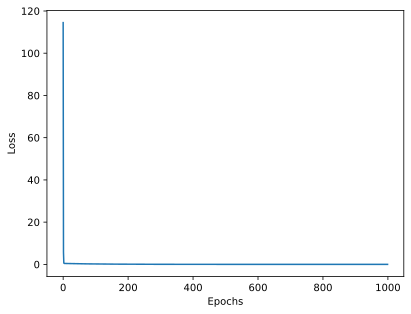

In [45]:
for epoch in trange(epochs):
    inputs = torch.tensor(x_values, dtype=torch.float32).to(device)
    labels = torch.tensor(y_values, dtype=torch.float32).to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criteria(outputs, labels)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'epoch {epoch}, loss {loss.item()}')

    losses.append(loss.item())

import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

Fig = plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [46]:
torch.save(model.state_dict(), 'model.pth')

In [47]:
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>